# Notebook for Visualizing English Letter Dataset

In [1]:
# standard library
import os
import json

# local classes
os.chdir('../')
from TraversalDistance.Graph import Graph
from TraversalDistance.FreeSpaceGraph import FreeSpaceGraph
from TraversalDistance.Visualize import Visualize
from TraversalDistance.BinarySearch import BinarySearch
os.chdir('letter_data')

### Loading Files into Graph Classes

In [2]:
def json_to_graph(json_data):    
    graph = Graph()
    graph.name = json_data['gxl']['graph'][0]['$']['id'][0]
    
    # Extract X, Y coordinates from 'node' elements.
    for node_data in json_data['gxl']['graph'][0]['node']:
        node_id = int(node_data['$']['id'][1:])
        x_coord = float(node_data['attr'][0]['float'][0])
        y_coord = float(node_data['attr'][1]['float'][0])
        graph.addNode(node_id, x_coord, y_coord)

    # Check if edges exist in graph (not just nodes).
    #if 'edge ' in json_data['gxl']['graph'][0]:
        
    # Extract edges from 'edge' elements.
    for i, edge_data in enumerate(json_data['gxl']['graph'][0]['edge'], 1):
        from_node = int(edge_data['$']['from'][1:])
        to_node = int(edge_data['$']['to'][1:])
        graph.connectTwoNodes(i, from_node, to_node)
        
    return graph, graph.name

# Check if input correct return True for 0 distance between two identical graphs.
def is_valid(json_graph):
    g1, n1 = json_to_graph(json_graph)
    g1.id = 0
    g2, n2 = json_to_graph(json_graph)
    g1.id = 1
    fsg = FreeSpaceGraph(g1, g2, 0.001)
    check1 = fsg.DFSTraversalDist()
    fsg = FreeSpaceGraph(g2, g1, 0.001)
    check2 = fsg.DFSTraversalDist()
    
    if check1 == True and check2 == True: 
        return True
    else: 
        return False
    

In [3]:
# Bad edge graphs
bad_filenames = list()

In [4]:
file_names = os.listdir("LOW")
graphs = dict()

for index, file_name in enumerate(file_names):
    if file_name.endswith('.json'):
        try:         
            json_graph = json.load(open(f"LOW/{file_name}"))
            
            if is_valid(json_graph=json_graph):
                graph, name = json_to_graph(json_graph)
                graph.id = index           
                if name in graphs.keys():
                    graphs[name].append(graph)
                else:
                    graphs[name] = [graph]
            else:
                raise Exception("Incompatible graph input.")
                
        except Exception as error: 
            print(f"AssertionError {error}: Fail to parse {file_name}.")
            
            # Bad edge graphs
            if 'edge' in str(error):
                bad_filenames.append(file_name)


AssertionError float division by zero: Fail to parse TP1_0107.json.
AssertionError float division by zero: Fail to parse AP1_0028.json.
AssertionError float division by zero: Fail to parse XP1_0130.json.
AssertionError float division by zero: Fail to parse HP1_0136.json.
AssertionError float division by zero: Fail to parse EP1_0077.json.
AssertionError float division by zero: Fail to parse EP1_0132.json.
AssertionError math domain error: Fail to parse TP1_0042.json.
AssertionError float division by zero: Fail to parse HP1_0073.json.
AssertionError float division by zero: Fail to parse XP1_0075.json.
AssertionError math domain error: Fail to parse NP1_0043.json.
AssertionError math domain error: Fail to parse EP1_0020.json.
AssertionError math domain error: Fail to parse AP1_0090.json.
AssertionError float division by zero: Fail to parse HP1_0024.json.
AssertionError float division by zero: Fail to parse TP1_0015.json.
AssertionError float division by zero: Fail to parse ZP1_0108.json.


In [5]:
print("no. bad graph:", len(bad_filenames))
for i in bad_filenames:
    print(i)

no. bad graph: 7
VP1_0125.json
LP1_0103.json
LP1_0136.json
LP1_0086.json
LP1_0068.json
VP1_0086.json
IP1_0110.json


In [6]:
for key in graphs.keys():
    count = len(graphs[key])
    print(f"{key}: {count}")

Y: 136
I: 149
E: 19
N: 126
L: 143
M: 139
X: 15
V: 141
W: 131
T: 18
Z: 129
K: 9
F: 14
A: 3
H: 4


### Saving Visualizations to SVG 

In [7]:
# Sample
g1, g2 = graphs['Y'][2], graphs['Z'][1]

# comparing graph two and graph one
binary_search = BinarySearch(g1, g2, left=0, right=5, precision=0.01)
epsilon = binary_search.search()
print("Computing graph_2 by graph_1 (traversed) minimum epsilon:", epsilon)

# comparing graph one and graph two
binary_search = BinarySearch(g2, g1, left=0, right=5, precision=0.01)
epsilon = binary_search.search()
print("Computing graph_1 by graph_2 (traversed) minimum epsilon:", epsilon)

Computing graph_2 by graph_1 (traversed) minimum epsilon: 1.07421875
Computing graph_1 by graph_2 (traversed) minimum epsilon: 1.07421875


(<Figure size 640x480 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x11cb66760>)

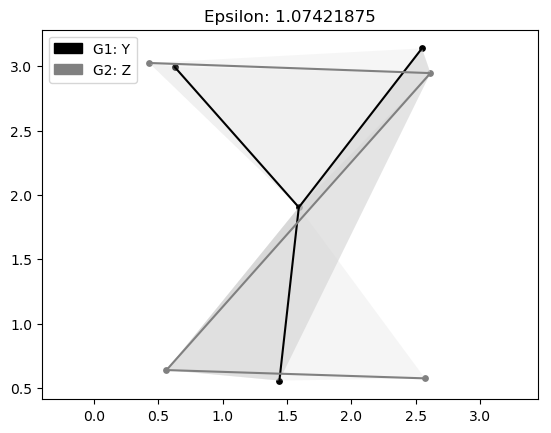

In [8]:
visual = Visualize(g1, g2, epsilon=epsilon)
visual.plot_freespace()

### Visualizing Traversal Dist Edge Cases

In [9]:
letter = 'E'
epsilons = dict()
for i, g1 in enumerate(graphs[letter]):
    for j, g2 in enumerate(graphs[letter]):

        binary_search = BinarySearch(g1, g2, left=0, right=5, precision=0.01)
        epsilon_1 = binary_search.search()

        binary_search = BinarySearch(g2, g1, left=0, right=5, precision=0.01)
        epsilon_2 = binary_search.search()
        
        epsilons[(i, j)] = abs(epsilon_2 - epsilon_1)

print("Operations:", len(graphs[letter])**2)

Operations: 361


In [10]:
top = sorted(epsilons.items(), key=lambda item: item[1], reverse=True)[:5]
top_keys = [key for key, value in top]

for key in top_keys:
    print(key, "--> epsilon:", epsilons[key])

(0, 16) --> epsilon: 0.322265625
(16, 0) --> epsilon: 0.322265625
(4, 8) --> epsilon: 0.29296875
(8, 4) --> epsilon: 0.29296875
(5, 16) --> epsilon: 0.2734375


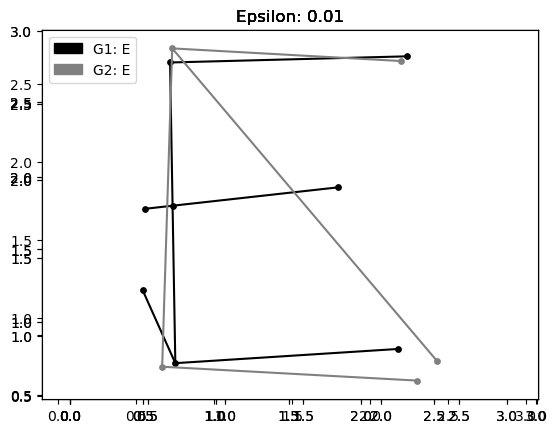

In [11]:
for key in top_keys:
    i, j = key[0], key[1]
    g1, g2 = graphs[letter][i], graphs[letter][j]
    visual = Visualize(g1, g2, epsilon=0.01)
    visual.plot_freespace()